# **Tweets Sentiment Analysis** 

## 1. Business Understanding

In a world where technology startups are common, consumer perception of a brand can provide us with valuable information about their purchasing behavior and, in turn, the financial performance of the business that produces them.In order to determine which brands to research further for potential investment, Longview techventures wants a generalizable model to measure sentiment across various brands. Because people only purchase items they like, Longview techventures is only interested in whether consumers feel positive about the brand.Longview techventures, a technology investment firm, has hired us to help them develop a predictive model that keeps track of recent tweets about tech products so they can make smart investment choices.

### a) Specifying the Data Analytic Question

What does the public feel about the apple and android products?

### b) Defining the Metric for Success

We don't want to overvalue or undervalue a company, however, in the current market condition where labor cost and shortage is prominent, spending human resources to evaluate a company and finding out it's not worth investing in is more costly. Therefore, we care about maximizing accuracy as well as precision to about 80%.

### c) Understanding the context 

False positive in this case would mean our model predicts that a consumer has positive emotions towards a brand but they actually don't, leading to overvaluing of a potential investment opportunity and wasting human capital.

False negative in this case would mean our model predicts that a consumer doesn't have positive emotions towards a brand but they actually do, leading to missing a potential investment opportunity.

### d) Data Relevance

Longview Techventures will use the data to determine which products to invest in to increase their profits based on customer satisfaction.

## 2. DATA UNDERSTANDING

[Data.world](https://data.world/crowdflower/brands-and-product-emotions) through CrowdFlower, provided the dataset. Over 8,000 Tweets were rated as either positive, negative, or neither by human raters. The tweets are from the South by South West conference, and the majority of them are about Apple and Google products. The information was assembled in 2013.
Tweets are typically brief and emotional. They do a great job of capturing consumers' reactions to brands in real time. South by Southwest features the most recent technology and enables customers to contrast products from leading tech companies side by side, which can somewhat lessen their biases.
The tweets with positive sentiment and the tweets without positive sentiment, which include neutral, negative, and indistinguishable sentiments, are the two categories into which we engineered our target.Only the sentiment of the tweet matters to us because it can increase sales and therefore return on investment.

### a) Reading the Data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import nltk
import string
import re
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import RegexpTokenizer, word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split, cross_validate
from numpy import array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB


from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_colwidth', 10000)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
# Loading the Data from the source i.e. csv
data = pd.read_csv('/judge_tweet_product_company.csv')



### b) Checking the Data

In [3]:
# Determining the no. of records in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8720 non-null   object
 1   emotion_in_tweet_is_directed_at                     3169 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [4]:
# Previewing the top of our dataset
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [5]:
# Previewing the bottom of our dataset
data.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product
8720,�ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mention Google Tests ���Check-in Offers�۝ At #SXSW {link},NaN,No emotion toward brand or product


In [6]:
#check the shape of the dataframe
data.shape

(8721, 3)

### c) Tidying the Dataset

To make it easier to read and analyse the data, we rename the columns.

In [7]:
#rename columns for readability
data = data.rename(columns = {'tweet_text': 'Tweet', 
                         'emotion_in_tweet_is_directed_at': 'Product', 
                         'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'})
data.head()

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


Before doing our analysis, we check for missing data or duplicated rows 

In [8]:
#looking at data, duplicates and null values
print(data.info())
print(("-"*20))

# Check for duplicated rows
print('Total duplicated rows')
print(data.duplicated().sum())
print(("-"*20))

# Check for null values
print('Total null values')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      8720 non-null   object
 1   Product    3169 non-null   object
 2   Sentiment  8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB
None
--------------------
Total duplicated rows
22
--------------------
Total null values
Tweet           1
Product      5552
Sentiment       0
dtype: int64


Checking the contents in the product and sentiment columns 

In [9]:
# Print the value count of product and sentiment column
print(data['Product'].value_counts())
print(("-"*20))
print(data['Sentiment'].value_counts())

iPad                               910
Apple                              640
iPad or iPhone App                 451
Google                             412
iPhone                             288
Other Google product or service    282
Android App                         78
Android                             74
Other Apple product or service      34
Name: Product, dtype: int64
--------------------
No emotion toward brand or product    5156
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: Sentiment, dtype: int64


In [10]:
#Simplify sentiment labels for visualizations
dict_sent = {'No emotion toward brand or product':"No emotion", 
             'Positive emotion':'Positive emotion',
             'Negative emotion':'Negative emotion',
             "I can't tell": "I can't tell"}
data['Sentiment'] = data['Sentiment'].map(dict_sent)

**Handling duplicates**

In [11]:
#drop any NaN in the Tweet column
data['Tweet'].dropna(inplace=True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion


In [12]:
#More data cleaning procedures
#drop duplicates
data.drop_duplicates(inplace=True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8716,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8717,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion
8718,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion
8719,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion


As noted above, the tweet column has key words that show the product example `row 8719` has a customer complaining about an iphone and the prodcut is not identified. We can solve this by creating a function that find the product and tweet and combines to form the brand column.

In [13]:
# Checking for anomalies in the data
#drops Tweets with nonsensical characters
data.drop([6, 8720], inplace=True)

In [14]:
#reset the index after cleaning
data.reset_index(inplace=True)
data.drop(columns="index", inplace = True)

In [15]:
#looks at remaining NaN's
print(data.isna().sum())

Tweet           0
Product      5537
Sentiment       0
dtype: int64


In [16]:
#Fills NaN's with "Undefined" to help with data visualizations
data['Product'].fillna("Undefined", inplace = True)
data

,Tweet,Product,Sentiment
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion
...,...,...,...
8692,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",Undefined,No emotion
8693,Ipad everywhere. #SXSW {link},iPad,Positive emotion
8694,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Undefined,No emotion
8695,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Undefined,No emotion


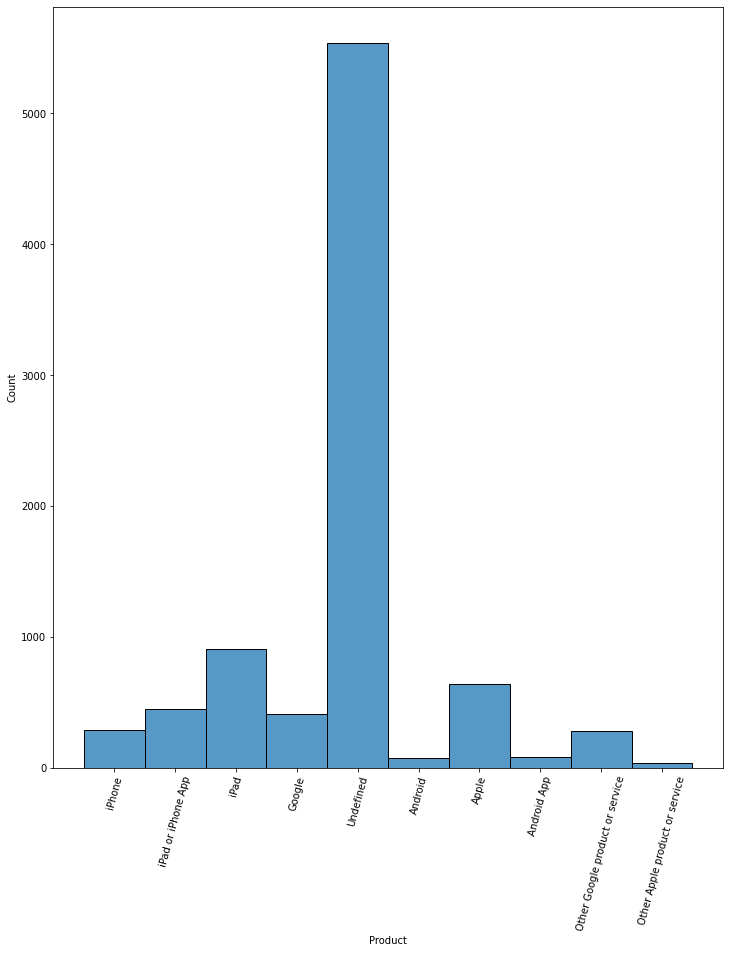

In [17]:
#Plot to check the distribution
fig, ax = plt.subplots(figsize=(12,14))
sns.histplot(data["Product"] )
plt.xticks(rotation = 75)
plt.show()

Although the imbalance between the unidentified products may make it difficult to analyze product sentiment, we can still use this column to identify the brand that the tweets are primarily focused on.

In [18]:
#we are going to set the Product type as a string for our function below.
data["Product"].astype(str)

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
8692             Undefined
8693                  iPad
8694             Undefined
8695             Undefined
8696             Undefined
Name: Product, Length: 8697, dtype: object

A brand's sentiment is being measured by the model. As a result, we need to examine how the dataset is divided up among the various companies. Two of the biggest tech brands in the world are represented by the two brands in this data set. Google and Apple. To assign each tweet to a brand, we will therefore create a new column.

In [19]:
# Function that finds a brand
def find_brand(Product, Tweet):
    """
    This function is designed to take build a brand column based on the Product description. 
    After, the function will look at the Tweets and determine a brand for rows with no brand determined.
    
    Product -  a column the function is working on
    Tweet - a column the function is working on
    """
    brand = 'Undetermined' #Labeling brand as Undetermined
    if ((Product.lower().__contains__('google')) or (Product.lower().__contains__('android'))): #Labeling Google
        brand = 'Google' #Unless tweet contains google or android
    elif ((Product.lower().__contains__('apple')) or (Product.lower().__contains__('ip'))): #Labeling Apple
        brand = 'Apple' #Unless tweet contains apple or ip
    
    if (brand == 'Undetermined'): 
        lower_tweet = Tweet.lower() #Making tweet lowercase
        is_google = (lower_tweet.__contains__('google')) or (lower_tweet.__contains__('android')) #Undetermined google
        is_apple = (lower_tweet.__contains__('apple')) or (lower_tweet.__contains__('ip')) #Undetermined apple
        
        if (is_google and is_apple): #if it has both identifiers in the tweet
            brand = 'Both' #Labeling brand as both
        elif (is_google):
            brand = 'Google' #Labeling brand as Google
        elif (is_apple):
            brand = 'Apple' #Labeling brand as Apple
    
    return brand

data['Brand'] = data.apply(lambda x: find_brand(x['Product'], x['Tweet']), axis = 1) #Applying function to column
data['Brand'].value_counts() #Reviewing value counts of each class within brand


Apple           5140
Google          2637
Undetermined     715
Both             205
Name: Brand, dtype: int64

We can now analyze sentiment across brands without losing data thanks to the creation of a brand column. To help our models be trained on real-world scenarios, we continue to use the Undertermined and Both Brands.

## 3. EXPLORATORY DATA ANALYSIS

Ploting the bivariate summaries and recording our observations

In [20]:
# This function builds a Seaborn countplot and allows the user to set certain parameters to customize the graph.
def countplot(df, col, hue=None, rotation=None):
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data = df, x = col, hue = hue, order = df[col].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation= rotation, fontsize = 15)
    ax.set_xlabel(xlabel = col, fontsize = 20)
    ax.tick_params(axis='y', which='major', labelsize=15)
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {col}", fontsize = 30)
    plt.show()


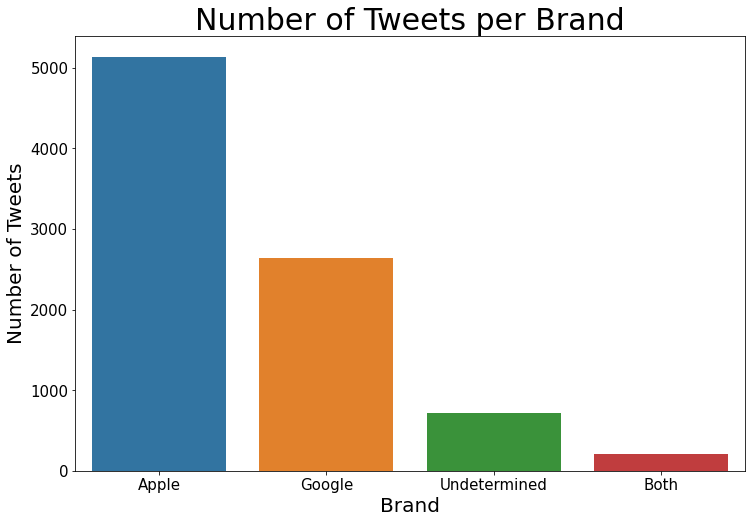

In [21]:
#countplot for Brand
countplot(data, "Brand")

As shown above in the histogram apple had more tweet comments as compared to other brands.

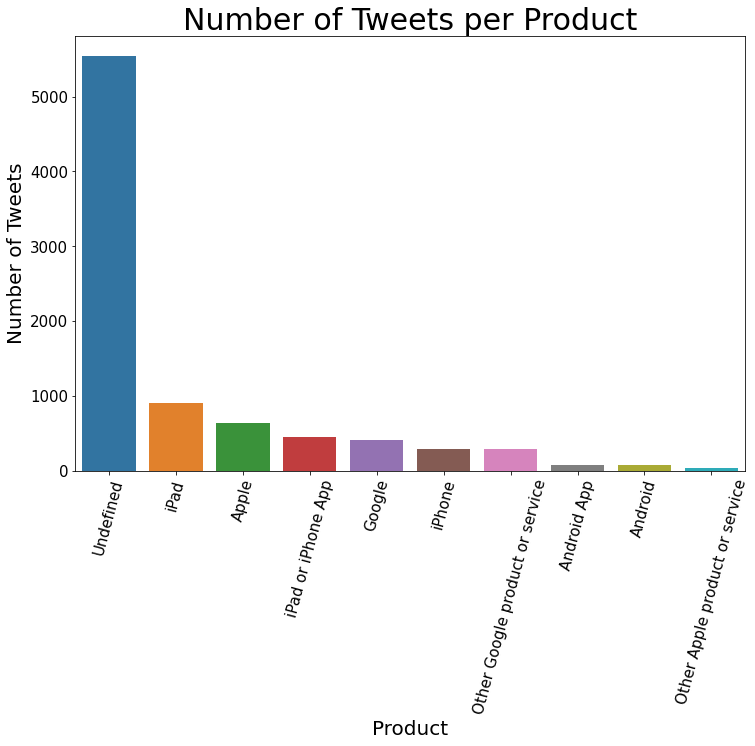

In [22]:
#countplot for Product
countplot(data, "Product", hue=None, rotation=75)

The histogram shows that most tweets belonged to undefined product followed by apple, ipad and iphone which are apple brand products.

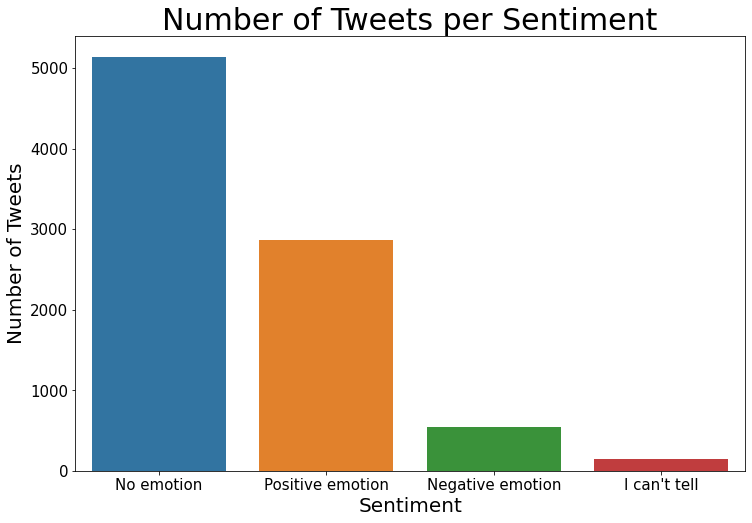

In [23]:
# Count plot for sentiment
countplot(data, "Sentiment")

No emotions had more tweets followed by positive emotions as shown in the histogram above

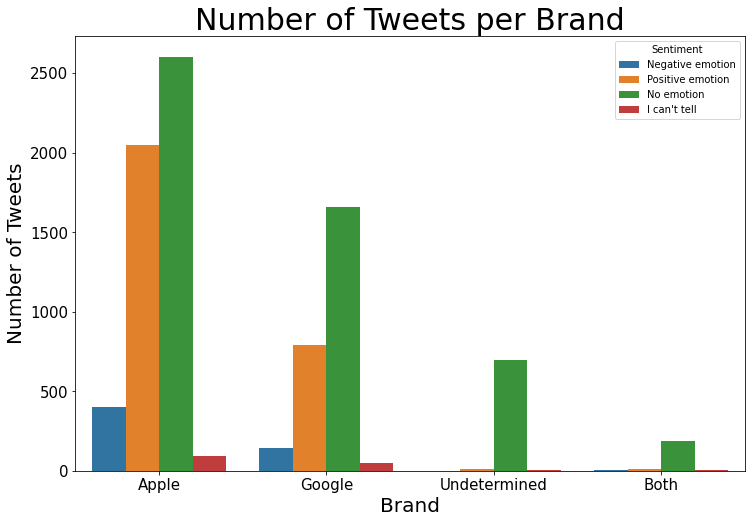

In [24]:
#count plot for Sentiment across brands
countplot(data, "Brand", hue = "Sentiment")

Apple still has the highest number of all the sentiments that is negative, positive,no emotion and i can't tell.

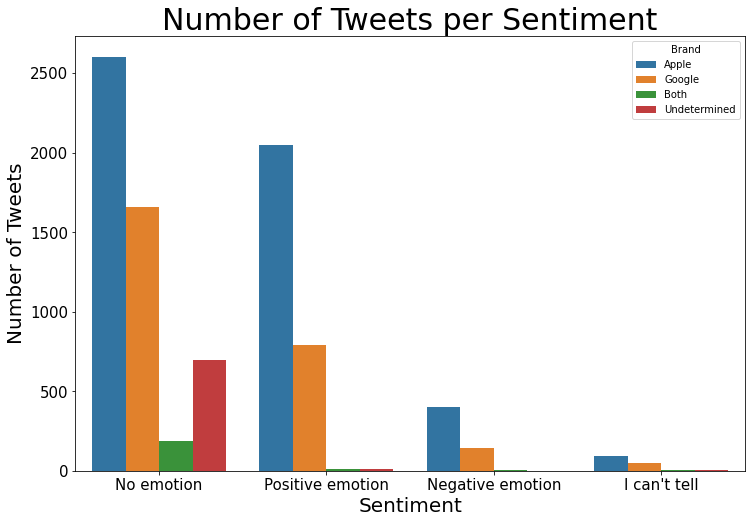

In [25]:
#countplot for brand make of sentiment
countplot(data, "Sentiment", hue="Brand")

The graph above still shows that apple leads in all the sentiments.

In [26]:
#looking at the number of tweets per brand per sentiment
grouped = data.groupby(["Brand", "Sentiment"]).count()
grouped

Tweet  Product
Brand        Sentiment                       
Apple        I can't tell         90       90
             Negative emotion    398      398
             No emotion         2604     2604
             Positive emotion   2048     2048
Both         I can't tell          7        7
             Negative emotion      3        3
             No emotion          185      185
             Positive emotion     10       10
Google       I can't tell         49       49
             Negative emotion    142      142
             No emotion         1656     1656
             Positive emotion    790      790
Undetermined I can't tell          5        5
             Negative emotion      1        1
             No emotion          696      696
             Positive emotion     13       13

In [27]:
#looking at sentitmental breakdown of brands
display(data.groupby(['Sentiment'])['Brand'].value_counts(normalize = True))
print("-"*60)
display(data.groupby(['Brand'])['Sentiment'].value_counts(normalize = True))

Sentiment         Brand       
I can't tell      Apple           0.596026
                  Google          0.324503
                  Both            0.046358
                  Undetermined    0.033113
Negative emotion  Apple           0.731618
                  Google          0.261029
                  Both            0.005515
                  Undetermined    0.001838
No emotion        Apple           0.506516
                  Google          0.322116
                  Undetermined    0.135382
                  Both            0.035985
Positive emotion  Apple           0.715834
                  Google          0.276127
                  Undetermined    0.004544
                  Both            0.003495
Name: Brand, dtype: float64

------------------------------------------------------------


Brand         Sentiment       
Apple         No emotion          0.506615
              Positive emotion    0.398444
              Negative emotion    0.077432
              I can't tell        0.017510
Both          No emotion          0.902439
              Positive emotion    0.048780
              I can't tell        0.034146
              Negative emotion    0.014634
Google        No emotion          0.627986
              Positive emotion    0.299583
              Negative emotion    0.053849
              I can't tell        0.018582
Undetermined  No emotion          0.973427
              Positive emotion    0.018182
              I can't tell        0.006993
              Negative emotion    0.001399
Name: Sentiment, dtype: float64

In [28]:
#Number of Tweets per product
print(data["Product"].value_counts())
print("-"*60)
#Number of Tweets per Sentiment
print(data["Sentiment"].value_counts())
print("-"*60)
#Number of Tweet per Brand
print(data["Brand"].value_counts())
print("-"*60)

Undefined                          5537
iPad                                909
Apple                               638
iPad or iPhone App                  450
Google                              410
iPhone                              287
Other Google product or service     282
Android App                          77
Android                              73
Other Apple product or service       34
Name: Product, dtype: int64
------------------------------------------------------------
No emotion          5141
Positive emotion    2861
Negative emotion     544
I can't tell         151
Name: Sentiment, dtype: int64
------------------------------------------------------------
Apple           5140
Google          2637
Undetermined     715
Both             205
Name: Brand, dtype: int64
------------------------------------------------------------


In [29]:
#Final DataFrame before Preprocessing
data

,Tweet,Product,Sentiment,Brand
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion,Apple
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion,Apple
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion,Google
...,...,...,...,...
8692,"@mention Yup, but I don't have a third app yet. I'm on Android, any suggestions? #SXSW CC: @mention",Undefined,No emotion,Google
8693,Ipad everywhere. #SXSW {link},iPad,Positive emotion,Apple
8694,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",Undefined,No emotion,Google
8695,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",Undefined,No emotion,Google


## 4. DATA PREPROCESSING AND FEATURE ENGINEERING

In this phase of the project, we will get to preprocess our data and prepare the text data for modeling by performing the tasks below.

use regular expression to remove:
- twitter handle
- links
- hash tags
- RT
- punctuations

remove
- stopwords
- lowercase
- numbers

tokenization

lemmatization

vectorization
- count

visualization
- frequency distribution(FreqDist)
- Word Cloud

First we will start by using regular expression in cleaning the text data stored in 'tweets' column by removing punctuations, links, retweets etc.

In [30]:
# Use regular expression to clean out the hash tags, links and punctuations from our tweet

def strip_links(text):
    """
    Remove links from our text
    """
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

    

def strip_all_entities(text):
    """
    Remove user handles, hashtags and punctuations from our text
    """
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

we will use the our two functions together  with the map() function to remove the links, tags and user handles from the tweets

In [31]:
# map the functions onto the data set
data['Tweet'] = data.Tweet.map(lambda x: strip_all_entities(strip_links(x)))

In [32]:
# load the data set
data.Tweet

0                                        I have a 3G iPhone After 3 hrs tweeting at Austin it was dead I need to upgrade Plugin stations at
1                            Know about Awesome iPad iPhone app that you ll likely appreciate for its design Also they re giving free Ts at
2                                                                                     Can not wait for 2 also They should sale them down at
3                                                                     I hope this year s festival isn t as crashy as this year s iPhone app
4                                  great stuff on Fri Marissa Mayer Google Tim O Reilly tech books conferences amp Matt Mullenweg Wordpress
                                                                       ...                                                                 
8692                                                                 Yup but I don t have a third app yet I m on Android any suggestions CC
8693                


Our function has been able to remove the handle, links and hashtags, but from row 8694, we can still see retweets present in our data, represented by the word RT. Because this is a major feature on twitter, it is bound to appear a lot, and thus should be removed as well.

Below, we will write a regular xpression to get rid of the RT from our data as well as the term ' link' that were used as placeholders for the links url. We'll also remove the @  and � characters that were still present in the text column together with mention.

In [33]:
data['Tweet'] = data.Tweet.map(lambda x: re.sub('RT', " ", x)) # Remove RT (retweet)
data['Tweet'] = data.Tweet.map(lambda x: re.sub('link', " ", x))# Remove link
data['Tweet'] = data.Tweet.map(lambda x: re.sub('@', " ", x)) # Remove @
data['Tweet'] = data.Tweet.map(lambda x: re.sub('mention', " ", x)) # Remove mention 
data['Tweet'] = data.Tweet.map(lambda x: re.sub('�+', " ", x)) # remove � character

# load the cleaned text data
data.Tweet

0                                        I have a 3G iPhone After 3 hrs tweeting at Austin it was dead I need to upgrade Plugin stations at
1                            Know about Awesome iPad iPhone app that you ll likely appreciate for its design Also they re giving free Ts at
2                                                                                     Can not wait for 2 also They should sale them down at
3                                                                     I hope this year s festival isn t as crashy as this year s iPhone app
4                                  great stuff on Fri Marissa Mayer Google Tim O Reilly tech books conferences amp Matt Mullenweg Wordpress
                                                                       ...                                                                 
8692                                                                 Yup but I don t have a third app yet I m on Android any suggestions CC
8693                

Now that we have that done and dusted. Let's remove the stopwords from our data set, ensure the words are in lower case, and then tokenize our dataset.

In [34]:
# create a word tokenize
def tokenize_data(text):
    """
    A function responsible for tokenizing our sentences
    """
    # tokenize the data
    tokens = word_tokenize(text)

    # create our stopwords
    stopwords_list = stopwords.words('english')
    stopwords_list += [str(x) for x in range(100)]

    # convert everything to lowercase
    clean_list = [word.lower() for word in tokens if word.lower() not in stopwords_list]

    return clean_list

Next, map the function above onto our text column.

In [35]:
# map the function above onto the tweet column
data['Tweet'] = data.Tweet.map(lambda x: tokenize_data(x))

# load the tokenized column
data.Tweet

0                                                      [3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]
1                                          [know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]
2                                                                                                              [wait, also, sale]
3                                                                               [hope, year, festival, crashy, year, iphone, app]
4             [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
8692                                                                             [yup, third, app, yet, android, suggestions, cc]
8693                                                                                      

Below, i will load the dataset after cleaning and tokenizing.

In [36]:
# load the cleaned data
data

,Tweet,Product,Sentiment,Brand
0,"[3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]",iPhone,Negative emotion,Apple
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]",iPad or iPhone App,Positive emotion,Apple
2,"[wait, also, sale]",iPad,Positive emotion,Apple
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,Apple
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]",Google,Positive emotion,Google
...,...,...,...,...
8692,"[yup, third, app, yet, android, suggestions, cc]",Undefined,No emotion,Google
8693,"[ipad, everywhere]",iPad,Positive emotion,Apple
8694,"[wave, buzz, interrupt, regularly, scheduled, geek, programming, big, news]",Undefined,No emotion,Google
8695,"[google, zeiger, physician, never, reported, potential, ae, yet, fda, relies, physicians, quot, operating, w, data, quot]",Undefined,No emotion,Google


After cleaning and tokenizing our data, the next step in our text preparation will be lemmatization. Lemmatization helps in transforming the text data by removing the suffixes of our data. Since lemmatizing uses part-of-speech tagging to determine how to transform a word, we'll need to incoperate word net in the lammetization.

Based on this below, i will create a function that converts the nltk parts-of-speech to wordnet tags. basically inputs the nltk pos tags and outputs the wordnet lemmatizer tags that can be interpretted by out lemmatizier

In [37]:
# from nltk download averaged_perceptron_tagger
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [38]:
# from nltk download tagsets
nltk.download('tagsets', quiet=True)

True

In [39]:
# create a function that takes in the nltk POS tags and transforms them to wordnet tags
def wordnet_pos(word_tag):
    '''
    Translate nltk POS to wordnet tags
    '''
    if word_tag.startswith('J'):
        return wordnet.ADJ
    elif word_tag.startswith('V'):
        return wordnet.VERB
    elif word_tag.startswith('N'):
        return wordnet.NOUN
    elif word_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Below i will index out the first tweet, then perform POS tagging on the indexed tweet.

In [40]:
# Index the first tweet in the tweet column
first_tweet = data['Tweet'][0]
first_tweet

['3g',
 'iphone',
 'hrs',
 'tweeting',
 'austin',
 'dead',
 'need',
 'upgrade',
 'plugin',
 'stations']

In [41]:
# Get the POS tags for the words in first_tweet
first_tweet = pos_tag(first_tweet)
first_tweet

[('3g', 'CD'),
 ('iphone', 'NN'),
 ('hrs', 'NN'),
 ('tweeting', 'VBG'),
 ('austin', 'NNS'),
 ('dead', 'JJ'),
 ('need', 'VBP'),
 ('upgrade', 'JJ'),
 ('plugin', 'NN'),
 ('stations', 'NNS')]

Based on the output above, we have have successfully gotten the the pos tags where the terms starting with N represent the nouns, J represents the adjective, V represents the verbs

Next, we will instantiate the lemmatizer and create a variable X that contains the data from  the tweet column.

In [42]:
 # inastantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

In [43]:
# create a variable X containing data from tweet column
X = data['Tweet']
X

0                                                      [3g, iphone, hrs, tweeting, austin, dead, need, upgrade, plugin, stations]
1                                          [know, awesome, ipad, iphone, app, likely, appreciate, design, also, giving, free, ts]
2                                                                                                              [wait, also, sale]
3                                                                               [hope, year, festival, crashy, year, iphone, app]
4             [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, books, conferences, amp, matt, mullenweg, wordpress]
                                                                  ...                                                            
8692                                                                             [yup, third, app, yet, android, suggestions, cc]
8693                                                                                      

In the code cell below, we will create a function that takes in the text from the variable X, gets the Pos tags of the text, then uses the wordnet_pos function above to get the wordnet tags that are then passed on to our lemmatizer.

In [44]:
def word_lemma(text):
    '''
    Translate the text POS tags to Word net tags then pass it to the lemmatizer
    
    '''
    # get the pos tags for the text
    word_pos_tags = pos_tag(text)
    
    # translate the pos tags to word net tags
    word_net_tag = [(text[0], wordnet_pos(text[1])) for text in word_pos_tags]
    
    # Pass the text with the wordnet tags to the lemmatizer
    lemma_word = [lemmatizer.lemmatize(text[0], text[1]) for text in word_net_tag]
    
    return lemma_word
    

Map the function created above onto the X variable created above.

In [45]:
# map the function above
data['Tweet'] = X.map(lambda x: word_lemma(x))


In [46]:
# load the lemmatized tweet column
data['Tweet']

0                                                       [3g, iphone, hr, tweet, austin, dead, need, upgrade, plugin, station]
1                                         [know, awesome, ipad, iphone, app, likely, appreciate, design, also, give, free, t]
2                                                                                                          [wait, also, sale]
3                                                                           [hope, year, festival, crashy, year, iphone, app]
4           [great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, amp, matt, mullenweg, wordpress]
                                                                ...                                                          
8692                                                                          [yup, third, app, yet, android, suggestion, cc]
8693                                                                                                       [ipad, ever

### Plot a Frequency Distribution 

We will create a frequency distribution plot that shows the words that appear in the tweet columns together with the count.

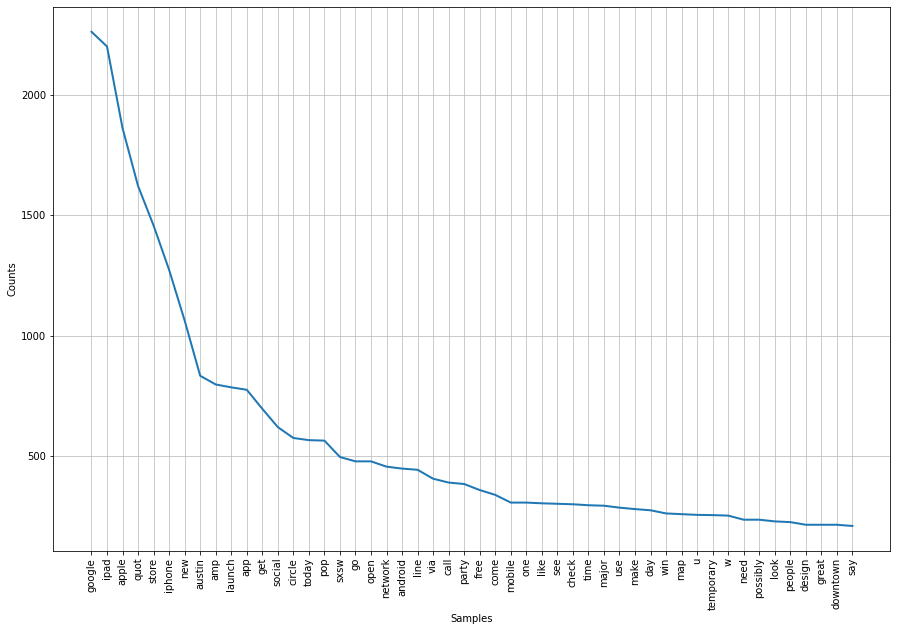

In [47]:
sample = data['Tweet']
freq1_dist = []

for tweet in sample:
    freq1_dist.extend(tweet)
    
fdist = FreqDist(freq1_dist)
plt.figure(figsize=(15, 10))
fdist.plot(50);

Based on the output, we can see that google is the word with the highest count within the text data followed by ipad and apple. Below, i wil use the fdist() method to get the actual count of the first 200 words, it will also help in checking if there are any anomalies in the text.

In [48]:
# display the count of the first 200 texts
word_frequency = fdist.most_common(200)
word_frequency[:30]

[('google', 2261),
 ('ipad', 2200),
 ('apple', 1861),
 ('quot', 1621),
 ('store', 1457),
 ('iphone', 1273),
 ('new', 1063),
 ('austin', 834),
 ('amp', 798),
 ('launch', 786),
 ('app', 776),
 ('get', 697),
 ('social', 621),
 ('circle', 576),
 ('today', 567),
 ('pop', 565),
 ('sxsw', 497),
 ('go', 479),
 ('open', 479),
 ('network', 457),
 ('android', 449),
 ('line', 444),
 ('via', 407),
 ('call', 391),
 ('party', 385),
 ('free', 360),
 ('come', 340),
 ('mobile', 308),
 ('one', 308),
 ('like', 305)]

In [49]:
data1 = data.copy()

In [50]:
# The preprocessed data set
data

,Tweet,Product,Sentiment,Brand
0,"[3g, iphone, hr, tweet, austin, dead, need, upgrade, plugin, station]",iPhone,Negative emotion,Apple
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, give, free, t]",iPad or iPhone App,Positive emotion,Apple
2,"[wait, also, sale]",iPad,Positive emotion,Apple
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,Apple
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, amp, matt, mullenweg, wordpress]",Google,Positive emotion,Google
...,...,...,...,...
8692,"[yup, third, app, yet, android, suggestion, cc]",Undefined,No emotion,Google
8693,"[ipad, everywhere]",iPad,Positive emotion,Apple
8694,"[wave, buzz, interrupt, regularly, schedule, geek, program, big, news]",Undefined,No emotion,Google
8695,"[google, zeiger, physician, never, report, potential, ae, yet, fda, relies, physicians, quot, operate, w, data, quot]",Undefined,No emotion,Google


In the code cell below, we will convert the lists in the tweet column into a string.

In [51]:
# convert the list into a string
data['Tweet'] = data.Tweet.map(lambda x: ' '.join(map(str, x)))
data

,Tweet,Product,Sentiment,Brand
0,3g iphone hr tweet austin dead need upgrade plugin station,iPhone,Negative emotion,Apple
1,know awesome ipad iphone app likely appreciate design also give free t,iPad or iPhone App,Positive emotion,Apple
2,wait also sale,iPad,Positive emotion,Apple
3,hope year festival crashy year iphone app,iPad or iPhone App,Negative emotion,Apple
4,great stuff fri marissa mayer google tim reilly tech book conference amp matt mullenweg wordpress,Google,Positive emotion,Google
...,...,...,...,...
8692,yup third app yet android suggestion cc,Undefined,No emotion,Google
8693,ipad everywhere,iPad,Positive emotion,Apple
8694,wave buzz interrupt regularly schedule geek program big news,Undefined,No emotion,Google
8695,google zeiger physician never report potential ae yet fda relies physicians quot operate w data quot,Undefined,No emotion,Google


### Word Cloud

Next, we will plot a word cloud visualization which depicts text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

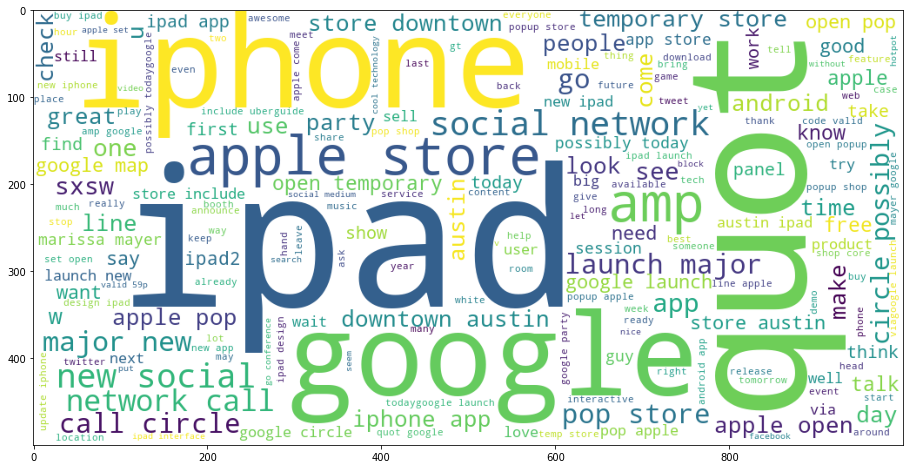

In [52]:
mpl.rcParams['figure.figsize'] = 20,8
sample_data = data['Tweet']

word_cloud =" "
for row in sample_data:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud);

## 5. MODELING AND EVALUATION

The step of the project will include the following steps:
1. Specifying our X and y.
2. Spliting our data into training and testing data
3. Vectorizing our data using TF-IDF vectorizer
4. Choosing a baseline model
5. Tuning the selected baseline model

Our target variable will be the 'Sentiment' column and our feature variable will be the 'Tweet' column. Once specified we will proceed to split our data with the test size set at 20%.

In [77]:
#Specifying X and y
X = data['Tweet']
y = data['Sentiment']

In [78]:
#Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
#Instantiate the TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=400)

#Fitting and transforming the training data
X_train_vec = vectorizer.fit_transform(X_train).toarray()

#Fitting on test data
X_test_vec = vectorizer.transform(X_test).toarray()

In [80]:
#Checking dimensions of vectorized data
X_train_vec.shape, X_test_vec.shape


((6957, 6269), (1740, 6269))

## Baseline Model

Now that our data is split and vectorized we can proceed to modeling. We will build different models using their default parameters and compare their performance. We will create a function to make the comparisons against the models.

In [57]:
#Create the function

""" This function takes in the specific model, the train and test data.
    Using the specific model,it predicts on the X_train and X_test.
    Finally it provides a classfication report on the Training Prediction
    and Testing Prediction"""
    
def get_prediction(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Training Prediction')
    print('--------------------')
    print(classification_report(y_train, y_train_pred))
    print('Test Prediction')
    print('--------------------')
    print(classification_report(y_test, y_test_pred))
    
    return y_train_pred, y_test_pred

The first model will be the Naive Bayes classifier for multinomial models given it is known for word counts for text classification.

In [82]:
#Instantiate Multinomial
model_NB = MultinomialNB()

# Fit on the train data
model_NB.fit(X_train_vec, y_train)

MultinomialNB()

In [59]:
# Predictions and  classification report
_, _ = get_prediction(model_NB, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       1.00      0.05      0.09       415
      No emotion       0.71      0.98      0.82      4139
Positive emotion       0.87      0.47      0.61      2283

        accuracy                           0.74      6957
       macro avg       0.65      0.37      0.38      6957
    weighted avg       0.77      0.74      0.70      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.67      0.02      0.03       129
      No emotion       0.63      0.94      0.75      1002
Positive emotion       0.68      0.28      0.39       578

        accuracy                           0.63      1740
       macro avg       0.49      0.31      0.29      1740
    weighted avg       0.64      0.63      0.57

In [60]:
#Instantiate a Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit on train data
model_rf.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Get predictions and  classification report
_, _ = get_prediction(model_rf, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.95      0.87      0.90       120
Negative emotion       0.98      0.92      0.95       415
      No emotion       0.95      0.98      0.96      4139
Positive emotion       0.96      0.92      0.94      2283

        accuracy                           0.95      6957
       macro avg       0.96      0.92      0.94      6957
    weighted avg       0.95      0.95      0.95      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.73      0.15      0.25       129
      No emotion       0.68      0.82      0.74      1002
Positive emotion       0.59      0.49      0.54       578

        accuracy                           0.65      1740
       macro avg       0.50      0.37      0.38      1740
    weighted avg       0.64      0.65      0.62

The third model will be the Logistic Regression model

In [61]:
#Instantiate the Logistic Regression model
model_lr =LogisticRegression()

#Fit on train data
model_lr.fit(X_train_vec, y_train)

LogisticRegression()

In [62]:
# Get predictions and  classification report
_, _ = get_prediction(model_lr, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       0.91      0.15      0.26       415
      No emotion       0.77      0.95      0.85      4139
Positive emotion       0.84      0.64      0.73      2283

        accuracy                           0.79      6957
       macro avg       0.63      0.44      0.46      6957
    weighted avg       0.79      0.79      0.76      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.73      0.06      0.11       129
      No emotion       0.67      0.86      0.75      1002
Positive emotion       0.60      0.46      0.52       578

        accuracy                           0.65      1740
       macro avg       0.50      0.34      0.35      1740
    weighted avg       0.64      0.65      0.61

Finally we will test our data using Long Short Term Memory Networks(LSTM).

## Long Short Term Memory Networks

In [63]:
# preview the data
data1


,Tweet,Product,Sentiment,Brand
0,"[3g, iphone, hr, tweet, austin, dead, need, upgrade, plugin, station]",iPhone,Negative emotion,Apple
1,"[know, awesome, ipad, iphone, app, likely, appreciate, design, also, give, free, t]",iPad or iPhone App,Positive emotion,Apple
2,"[wait, also, sale]",iPad,Positive emotion,Apple
3,"[hope, year, festival, crashy, year, iphone, app]",iPad or iPhone App,Negative emotion,Apple
4,"[great, stuff, fri, marissa, mayer, google, tim, reilly, tech, book, conference, amp, matt, mullenweg, wordpress]",Google,Positive emotion,Google
...,...,...,...,...
8692,"[yup, third, app, yet, android, suggestion, cc]",Undefined,No emotion,Google
8693,"[ipad, everywhere]",iPad,Positive emotion,Apple
8694,"[wave, buzz, interrupt, regularly, schedule, geek, program, big, news]",Undefined,No emotion,Google
8695,"[google, zeiger, physician, never, report, potential, ae, yet, fda, relies, physicians, quot, operate, w, data, quot]",Undefined,No emotion,Google


In [64]:
#Specifing our target variable
target = data1['Sentiment']

In [65]:
#Encoding the target variable
y = pd.get_dummies(target).values

In [66]:
#Tokenizing our data, converting to sequence and padding to the same length
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(data1['Tweet'])
list_tokenized_headlines = tokenizer.texts_to_sequences(data1['Tweet'])
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

In [67]:
#Splitting our data with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

In [68]:
#Insantiate the model
model = Sequential()

In [69]:
#Adding the LSTM layers
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [70]:
#Model compilation
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [71]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, None, 25)          15400     
                                                                 
 global_max_pooling1d (Globa  (None, 25)               0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense (Dense)               (None, 20)                520       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                        

In [72]:
#Fitting the model on train data
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
174/174 [==============================] - 14s 70ms/step - loss: 1.0836 - accuracy: 0.5594 - val_loss: 0.9186 - val_accuracy: 0.5855
Epoch 2/5
174/174 [==============================] - 12s 67ms/step - loss: 0.9756 - accuracy: 0.5799 - val_loss: 0.8943 - val_accuracy: 0.5855
Epoch 3/5
174/174 [==============================] - 12s 67ms/step - loss: 0.9083 - accuracy: 0.6095 - val_loss: 0.8484 - val_accuracy: 0.6530
Epoch 4/5
174/174 [==============================] - 12s 67ms/step - loss: 0.7796 - accuracy: 0.6836 - val_loss: 0.8189 - val_accuracy: 0.6451
Epoch 5/5
174/174 [==============================] - 12s 67ms/step - loss: 0.6666 - accuracy: 0.7391 - val_loss: 0.8441 - val_accuracy: 0.6545


In [73]:
#Evaluate the model
model.evaluate(X_test,y_test)

55/55 [==============================] - 1s 11ms/step - loss: 0.8919 - accuracy: 0.6356


[0.8918940424919128, 0.6356321573257446]

For this project we will use f1-score as our evaluation metric since it is the mean of precision and recall. In our case it is important that we analyze the sentiment correctly since we want to know that for all the sentiments predicted as positive or negative or no emotion are they actually so (precision). Similarly to those not predicted as positive, negative or no emotion is that the case as well (recall). A mean of the two would be best suitable for our sentiment analysis.

The Random Forest Classifier and LSTM model have a problem with overfitting since their training accuracy is higher than the test accuracy. For the Random Forest the training accuracy is at 0.95 against 0.65 for the test data and for the LSTM the training accuracy is at 0.88 and 0.65. Given that we are using F1-score as our metric we will use the multinomial naive bayes classifier as our model.

## Hyperparameters tuning

We will tune alpha values for the naive bayes classifier to try and get better f1 scores.

In [84]:
#We will perform a grid search on the alpha values
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

#Using grid search
model_nb_grid = GridSearchCV(model_NB, param_grid=params, n_jobs=-1, cv=5, verbose=5)

#Fit on train data
model_nb_grid.fit(X_train_vec, y_train)

#Get predictions and classification report
_, _ = get_prediction(model_nb_grid, X_train_vec, X_test_vec, y_train, y_test)
                             

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       1.00      0.01      0.02       120
Negative emotion       0.97      0.16      0.28       415
      No emotion       0.76      0.97      0.85      4139
Positive emotion       0.87      0.61      0.72      2283

        accuracy                           0.79      6957
       macro avg       0.90      0.44      0.47      6957
    weighted avg       0.81      0.79      0.76      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.86      0.05      0.09       129
      No emotion       0.64      0.89      0.75      1002
Positive emotion       0.59      0.36      0.45       578

        accuracy                           0.63      1740
       macro avg       0.52      0.32      0.

In [85]:
#Getting best parameters
print('Best Parameters : ',model_nb_grid.best_params_)

Best Parameters :  {'alpha': 0.5}


After tuning the parameters the best alpha value is 0.5. The training accuracy has increased from 0.74 to 0.79 while the testing accuracy has reduced from 0.63 to 0.60 which has caused an increase in overfitting. The f1 scores have both increased and decreased which has not really helped our model. Therefore combining this with the increased overfitting we will stick with our first multinomial naive bayes classifier.

#Evaluation

how well did your final model perform?

Include one or more relevant metrics 

Be sure to briefly describe your validation approach

##Final Model
pick the best model from all our models

explain why it is our best model

Model it once again

evaluate and validate it

explain its performance
##Findings and Recommendations
##Next Steps

##Complement naive bayes model

This model used a tfidf vectorizer with a ScikitLearn's Complement Naive Bayes classifier. This classifier is designed to remedy class imbalance, which is a significant hurdle in this problem

In [86]:
#imorting complementNB
from sklearn.naive_bayes import ComplementNB
clf = ComplementNB()
clf.fit(X_train_vec, y_train)


ComplementNB()

In [87]:
_, _ = get_prediction(clf, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.32      0.53      0.40       120
Negative emotion       0.66      0.74      0.70       415
      No emotion       0.84      0.82      0.83      4139
Positive emotion       0.77      0.76      0.76      2283

        accuracy                           0.79      6957
       macro avg       0.65      0.71      0.67      6957
    weighted avg       0.80      0.79      0.79      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.02      0.03      0.03        31
Negative emotion       0.36      0.32      0.34       129
      No emotion       0.70      0.70      0.70      1002
Positive emotion       0.52      0.53      0.52       578

        accuracy                           0.60      1740
       macro avg       0.40      0.39      0.40      1740
    weighted avg       0.60      0.60      0.60

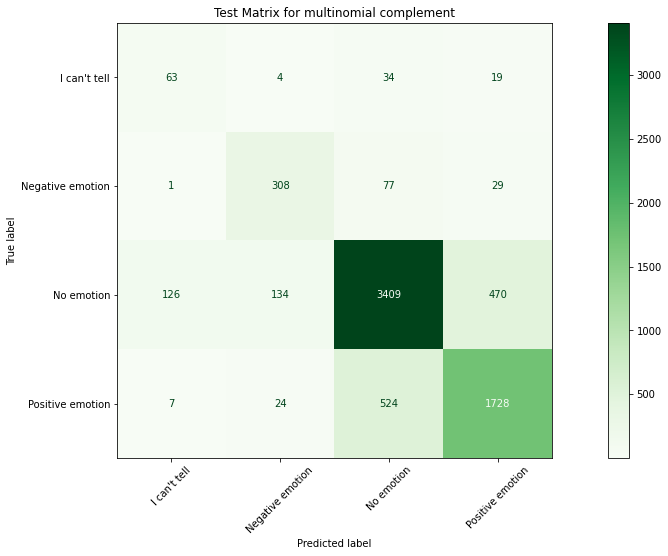

In [88]:
#Import confusionmatrix from sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_train_vec, y_train, cmap="Greens")
#ploting confusionmatrix
plt.grid(False)
plt.title('Test Matrix for multinomial complement')
plt.xticks(rotation = 45)
plt.show()

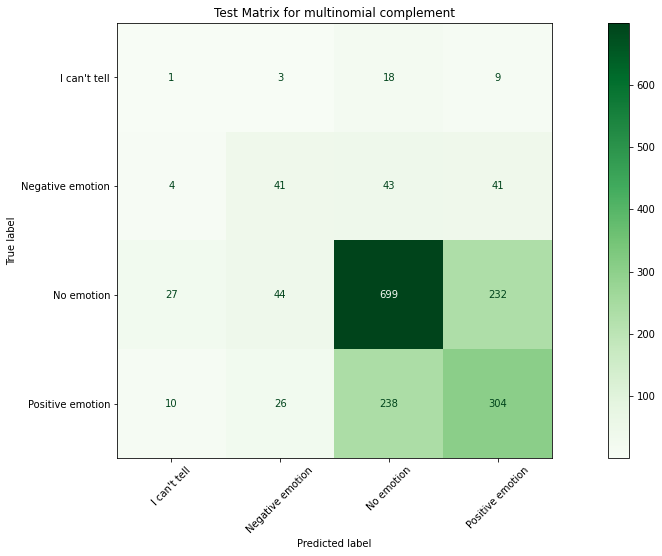

In [89]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test, cmap="Greens")
#ploting confusion matrix
plt.grid(False)
plt.title('Test Matrix for multinomial complement')
plt.xticks(rotation = 45)
plt.show()

Given the low prior probability of being in the negative category and i can't tell, we can see that the model is mostly just throwing things into the "no emotion category and completely ignoring the negative and i can't tell category. Clearly class imbalance is a big deal in this data.

## Best model

In [90]:
from sklearn.naive_bayes import MultinomialNB
#Instantiate Multinomial
model_NB = MultinomialNB()
model_NB.fit(X_train_vec, y_train)

MultinomialNB()

In [91]:
_, _ = get_prediction(model_NB, X_train_vec, X_test_vec, y_train, y_test)

Training Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00       120
Negative emotion       1.00      0.05      0.09       415
      No emotion       0.71      0.98      0.82      4139
Positive emotion       0.87      0.47      0.61      2283

        accuracy                           0.74      6957
       macro avg       0.65      0.37      0.38      6957
    weighted avg       0.77      0.74      0.70      6957

Test Prediction
--------------------
                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        31
Negative emotion       0.67      0.02      0.03       129
      No emotion       0.63      0.94      0.75      1002
Positive emotion       0.68      0.28      0.39       578

        accuracy                           0.63      1740
       macro avg       0.49      0.31      0.29      1740
    weighted avg       0.64      0.63      0.57

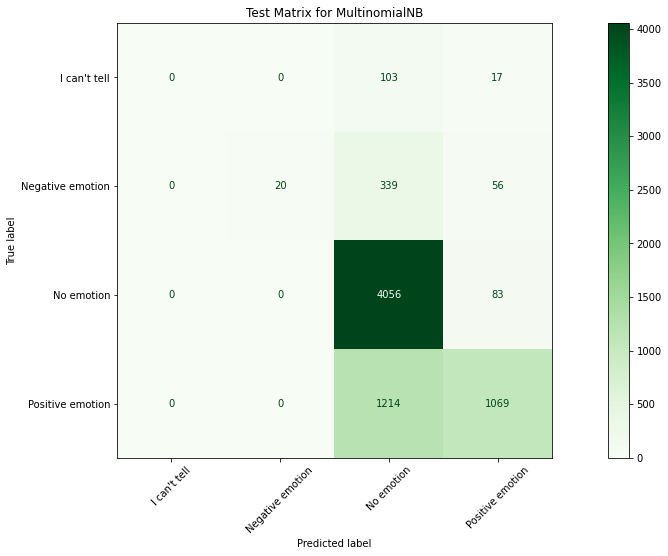

In [92]:
ConfusionMatrixDisplay.from_estimator(model_NB, X_train_vec, y_train, cmap="Greens")

plt.grid(False)
plt.title('Test Matrix for MultinomialNB')
plt.xticks(rotation = 45)
plt.show()

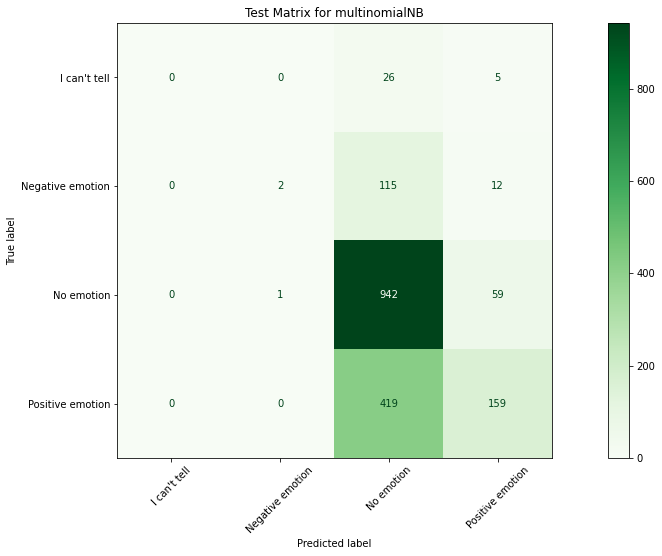

In [93]:
ConfusionMatrixDisplay.from_estimator(model_NB, X_test_vec, y_test, cmap="Greens")

plt.grid(False)
plt.title('Test Matrix for multinomialNB')
plt.xticks(rotation = 45)
plt.show()

### Priority
We will work with f1score since it combines precision and recall into a single metric by taking their harmonic mean - it's more important that we are conservative and lower our false negatives - so we can see what the negative tweets are saying and if it's worth investigating or responding to.


## Model Validation

In [94]:
#evaluate by cross validation
from sklearn.model_selection import cross_val_score
print(cross_val_score(model_NB, X_test_vec, y_test, cv=3))

[0.60344828 0.58965517 0.59827586]


## Findings

The first model I tested used ScikitLearn's tfidf Vectorizer to turn each tweet into a numerical vector by counting how many times each word appeared in the tweet. For this initial model, I included only single words and not n-grams in the vectorizer, and I did not set a maximum limit on the number of features. I then fed the vectorized tweets into ScikitLearn's Multinomial Naive Bayes classifier. This classifier supports binary as well as multi-class problems.

Our naive bayes model had an f1 score of 74% on train data and 63% on test data, which means that F1-score takes both precision and recall into account, which also means it accounts for both FPs and FNs.

## Recommendatation

Looking at the f1 score and confusion matrix of all the models, at this time the best model will be the MultiNomial Naïve Bayes model. Although not great the MultiNomial Naïve Bayes model has the highest f1score overall.Exploring other models in future could improve the overall performance.

## Future recommendations
1.	Natural language processing is a complex area of machine learning that has many different tools available for data scientists. Testing additional vectorizers and models may improve on these results. Pre-trained vectorizers such as Google's Word2Vec, Stanford's GloVe, and SpaCy may produce better results.
2.	 For future  similar events, we will also be able to deploy this model to detect consumer/brand sentiment in real-time.
3.	Scrape for more data to possibly balance the four classes, especially negative and positive tweets.
4.	Build a binary class focus on only the positive and negative comments then add the neutral comments later on.
5.	Obtain more tweet-data from other tech companies, particularly small startups and PR companies

# Next Steps
1.	Explore more ways to clean the tweet data and see how they affect the model
2.	Scrape and train on recent tweets because our dataset is from 2013 and technology is constantly changing
3.	Adding tweets about other sectors without being specific to certain brands could make the model more generalizable
4.	Train on more data including tweets with no products.
5.	Explore other forms of social media using the same vectorization method.